## import Modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import HTML
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

## Story Background

### It comes from a statistical puzzle: The Monty Hall problem. 

- Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8DMnAAvakh0" frameborder="0" allowfullscreen></iframe>')

## Question 1:Three Door Game without Cost
- Let's assume we have the same game as in the movie. We have three doors, behind one door is $1.00. The other two doors have nothing behind them. The host of the game knows where the dollar is. After you choose one door, the host opens an empty door for you.
- Build simulator to play N (make it 1000) rounds with each of the following strategies:
  1. The stick to your guns strategy -- don't change doors with new information;
  2. The "switch to the new door strategy" -- where you always switch to the last door once you get information from the host;

In [47]:
def three_door_game1(N=1000):
    switch = [0]
    stick = [0]
    prize = 1
    cost = 0
    for i in np.arange(N):      
        game = np.random.choice(3, 1)
        player = np.random.choice(3, 1)
        if game != player:
            switch += [switch[-1] + prize]
            stick += [stick[-1] + 0]
        else:
            stick += [stick[-1] + prize]
            switch += [switch[-1] + 0]
    return(switch,stick)

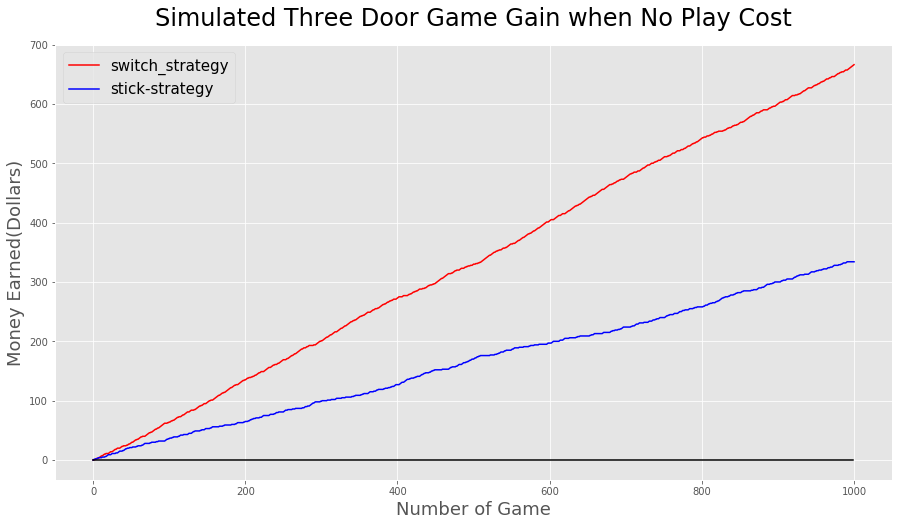

In [51]:
N = 1000 # Number of hands
(switch,stick) = three_door_game1(N)
plt.plot(switch, color='r', label='switch_strategy')
plt.plot(stick, color='b', label='stick-strategy')
plt.plot([0] * N,color='k')
plt.xlabel("Number of Game",fontsize=18)
plt.ylabel("Money Earned(Dollars)", fontsize=18)
plt.legend(fontsize=15)
plt.title("Simulated Three Door Game Gain when No Play Cost", fontsize = 24,y = 1.03)
plt.plot();

### Conclusion

The switch strategy, which earns about 660 dollars after 1000 games is better than stick strategy which earns about 330 after 1000 games.

## Question 2: Simulate the same game under the assumption that it costs $0.50 to play.

In [49]:
def three_door_game2(N=1000):
    switch = [0]
    stick = [0]
    prize = 1
    cost = 0.5
    for i in np.arange(N):        
        game = np.random.choice(3, 1)
        player = np.random.choice(3, 1)
        if game != player:
            switch += [switch[-1] + prize - cost]
            stick += [stick[-1] + 0 - cost]
        else:
            stick += [stick[-1] + prize - cost]
            switch += [switch[-1] + 0 - cost]
    return(switch,stick)

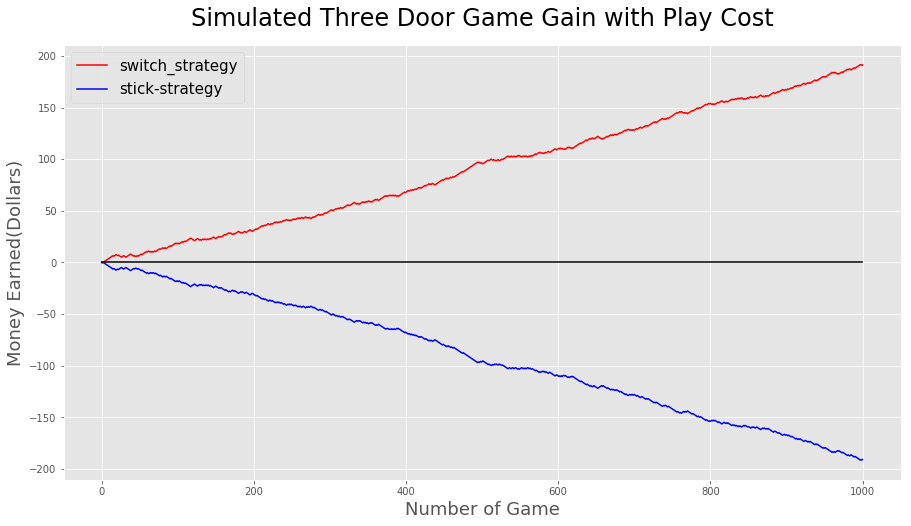

In [52]:
N = 1000 # Number of hands
(switch,stick) = three_door_game2(N)
plt.plot(switch, color='r', label='switch_strategy')
plt.plot(stick, color='b', label='stick-strategy')
plt.plot([0] * N,color='k')
plt.legend(fontsize=15)
plt.xlabel("Number of Game",fontsize=18)
plt.ylabel("Money Earned(Dollars)", fontsize=18)
plt.title("Simulated Three Door Game Gain with Play Cost", fontsize = 24,y = 1.03)
plt.plot();

### Conclusion

- For 'Switch Strategy' Player, it is worthy playing this game.
- For 'Stick Strategy' Player, it is not worthy playing this game.